<a href="https://colab.research.google.com/github/aromaldev/OCR-Malayalam/blob/master/SVM%20-%2044%20Classes%20-%20Feature%20Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM

Parameters

kernel  = rbf
C = 100
gamma = 0.2

Feature Extraction = PCA,Sobel,Robert,HOG


Jomy John, Kannan Balakrishnan, Pramod K. V, "A System for Offline Recognition of Handwritten Characters in Malayalam Script", *Department of Computer Applications Cochin University of Science and Technology, Kochi, Kerala, India* , DOI: 10.5815/ijigsp.2013.04.07

#### DATASET

44 Classes

Class name mapping:- data.target_names

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, plot_confusion_matrix
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
from skimage import filters
import cv2
import pandas as pd
from sklearn.utils import Bunch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
% mkdir data
% cd data
! unrar x /content/drive/MyDrive/data/OCRDATASET.rar

Streaming output truncated to the last 5000 lines.
Extracting  CHAR41/MD2091.jpg                                             95%  OK 
Extracting  CHAR41/MD2092.jpg                                             95%  OK 
Extracting  CHAR41/MD2093.jpg                                             95%  OK 
Extracting  CHAR41/MD2094.jpg                                             95%  OK 
Extracting  CHAR41/MD2095.jpg                                             95%  OK 
Extracting  CHAR41/MD2096.jpg                                             95%  OK 
Extracting  CHAR41/MD2097.jpg                                             95%  OK 
Extracting  CHAR41/MD2098.jpg                                             95%  OK 
Extracting  CHAR41/MD2099.jpg                                             95%  OK 
Extracting  CHAR41/MD21.jpg                                               95%  OK 
Extracting  CHAR41/MD210.jpg 

In [ ]:
def load_image_files(container_path,dimension=(30, 30),s=0, e=0):    
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()][s:e]
    categories = [fo.name for fo in folders]
    descr = "Malayalam Character classification dataset"
    images = []
    df = pd.DataFrame()
    target = []
    Sreq = dimension[0]
    for i, direc in enumerate(folders):
        j = 0
        for file in direc.iterdir():
            image = cv2.imread(str(file), 0)
            img_resized = cv2.resize(image, None, fx=Sreq/image.shape[0], fy=Sreq/image.shape[1],interpolation=cv2.INTER_CUBIC)
            g = filters.gaussian(img_resized)
            edge_roberts = filters.roberts(img_resized)
            fd= hog(img_resized, orientations=9, pixels_per_cell=(10, 10), 
                    cells_per_block=(2, 2))
            final = edge_roberts.flatten()
            fd = np.concatenate((g.flatten(),fd,final))
            if not fd.shape == (1944,):
              print(str(file))
              continue
            df = df.append(pd.DataFrame(fd.reshape(1,-1), columns=list(range(len(fd)))), ignore_index=True)
            target.append(i+s)
            j += 1
            if j == 1000:
              continue
        print(f'Folder {i+1} of {len(folders)} Retreived')
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=df,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

In [ ]:
dataset = load_image_files('./',s=0,e=10)

Folder 1 of 10 Retreived
Folder 2 of 10 Retreived
Folder 3 of 10 Retreived
Folder 4 of 10 Retreived
Folder 5 of 10 Retreived
Folder 6 of 10 Retreived
Folder 7 of 10 Retreived
Folder 8 of 10 Retreived
Folder 9 of 10 Retreived
Folder 10 of 10 Retreived


In [ ]:
dataset_2 = load_image_files('./',s=10,e=20)
dataset_3 = load_image_files('./',s=20,e=30)
dataset_4 = load_image_files('./',s=30,e=40)
dataset_5 = load_image_files('./',s=40,e=45)

Folder 1 of 10 Retreived
Folder 2 of 10 Retreived
Folder 3 of 10 Retreived
Folder 4 of 10 Retreived
Folder 5 of 10 Retreived
Folder 6 of 10 Retreived
Folder 7 of 10 Retreived
Folder 8 of 10 Retreived
Folder 9 of 10 Retreived
Folder 10 of 10 Retreived
Folder 1 of 10 Retreived
Folder 2 of 10 Retreived
Folder 3 of 10 Retreived
Folder 4 of 10 Retreived
Folder 5 of 10 Retreived
Folder 6 of 10 Retreived
Folder 7 of 10 Retreived
Folder 8 of 10 Retreived
Folder 9 of 10 Retreived
Folder 10 of 10 Retreived
Folder 1 of 10 Retreived
Folder 2 of 10 Retreived
Folder 3 of 10 Retreived
Folder 4 of 10 Retreived
Folder 5 of 10 Retreived
Folder 6 of 10 Retreived
Folder 7 of 10 Retreived
Folder 8 of 10 Retreived
Folder 9 of 10 Retreived
Folder 10 of 10 Retreived
Folder 1 of 4 Retreived
Folder 2 of 4 Retreived
Folder 3 of 4 Retreived
Folder 4 of 4 Retreived


##### Loading Dataset together

In [ ]:
categories = dataset.target_names + dataset_2.target_names + dataset_3.target_names + dataset_4.target_names + dataset_5.target_names

data = Bunch(data=np.concatenate((dataset.data,dataset_2.data,dataset_3.data,dataset_4.data,dataset_5.data)),
             target = np.concatenate((dataset.target,dataset_2.target,dataset_3.target,dataset_4.target,dataset_5.target)),
             target_names=categories,
                 DESCR=dataset.DESCR)

In [ ]:
data.data.shape

(91902, 1944)

##### Saving the dataset

In [ ]:
import pickle
with open('/content/drive/MyDrive/data/44.pickle' , 'wb') as _:
  pickle.dump(data,_)

In [ ]:
import pickle
with open('/content/drive/MyDrive/data/44.pickle' , 'rb') as _:
    data = pickle.load(_)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data.data,data.target,shuffle=True)
print(f''' Dimensions
X Train :- {x_train.shape}
Y Train :- {y_train.shape}
X Test  :- {x_test.shape}
Y Test :- {y_test.shape}
''')

 Dimensions
X Train :- (68926, 1944)
Y Train :- (68926,)
X Test  :- (22976, 1944)
Y Test :- (22976,)



#### Model Training

In [ ]:
model = SVC(kernel='rbf',gamma=0.02,C=100)
model.fit(x_train,y_train)

import joblib
joblib.dump(model, '/content/drive/MyDrive/data/44.joblib')

['/content/drive/MyDrive/data/44.joblib']

In [ ]:
import joblib
model = joblib.load('/content/drive/MyDrive/data/44.joblib')

#### Classifer Testing

In [ ]:
y_pred = model.predict(x_test)

##### Classification Report

In [ ]:
from sklearn.metrics import classification_report,plot_confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       533
           1       0.99      1.00      1.00       515
           2       0.98      0.99      0.98       535
           3       1.00      1.00      1.00       487
           4       1.00      1.00      1.00       487
           5       0.99      0.99      0.99       517
           6       1.00      1.00      1.00       548
           7       0.99      0.99      0.99       528
           8       1.00      0.99      1.00       522
           9       1.00      1.00      1.00       492
          10       1.00      0.99      1.00       513
          11       0.99      0.99      0.99       540
          12       1.00      1.00      1.00       547
          13       0.99      0.99      0.99       478
          14       1.00      0.99      0.99       501
          15       1.00      1.00      1.00       553
          16       0.99      0.99      0.99       534
          17       0.99    

##### Confusion Matrix

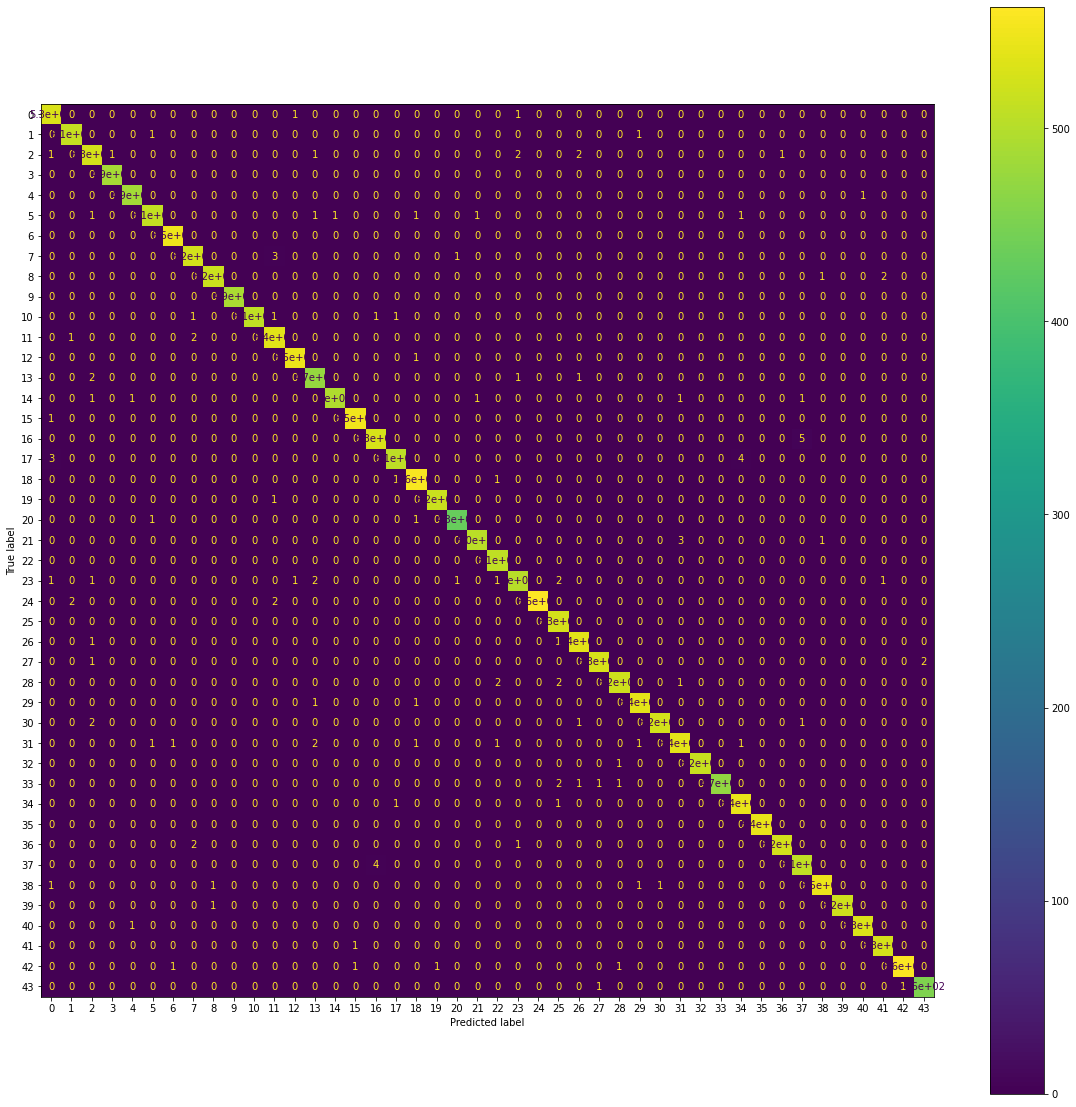

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(model,x_test, y_test, ax=ax)
plt.show()

In [ ]:
{i:j for i,j in enumerate(data.target_names)}

{0: 'CHAR11',
 1: 'CHAR17',
 2: 'CHAR24',
 3: 'CHAR29',
 4: 'CHAR6',
 5: 'CHAR21',
 6: 'CHAR19',
 7: 'CHAR18',
 8: 'CHAR5',
 9: 'CHAR2',
 10: 'CHAR15',
 11: 'CHAR23',
 12: 'CHAR25',
 13: 'CHAR28',
 14: 'CHAR12',
 15: 'CHAR20',
 16: 'CHAR41',
 17: 'CHAR14',
 18: 'CHAR27',
 19: 'CHAR1',
 20: 'CHAR22',
 21: 'CHAR10',
 22: 'CHAR33',
 23: 'CHAR38',
 24: 'CHAR31',
 25: 'CHAR26',
 26: 'CHAR35',
 27: 'CHAR4',
 28: 'CHAR8',
 29: 'CHAR40',
 30: 'CHAR39',
 31: 'CHAR37',
 32: 'CHAR43',
 33: 'CHAR32',
 34: 'CHAR36',
 35: 'CHAR9',
 36: 'CHAR13',
 37: 'CHAR30',
 38: 'CHAR34',
 39: 'CHAR16',
 40: 'CHAR7',
 41: 'CHAR42',
 42: 'CHAR44',
 43: 'CHAR3'}

##### Testing Individual Image

In [ ]:
df = []

file = "/content/data/CHAR3/MD1056.jpg"
dimension = (30,30)

image = cv2.imread(str(file), 0)
Sreq = dimension[0]
img_resized = cv2.resize(image, None, fx=Sreq/image.shape[0], fy=Sreq/image.shape[1],interpolation=cv2.INTER_CUBIC)
g = filters.gaussian(img_resized)
edge_roberts = filters.roberts(img_resized)
fd= hog(img_resized, orientations=9, pixels_per_cell=(10, 10), cells_per_block=(2, 2))
final = edge_roberts.flatten()
fd = np.concatenate((g.flatten(),fd,final))
df.append(fd)

df = np.array(df)

In [ ]:
data.target_names[model.predict(df)[0]]

'CHAR3'

In [ ]:
df = []

file = "/content/data/CHAR20/MD1056.jpg"
dimension = (30,30)

image = cv2.imread(str(file), 0)
Sreq = dimension[0]
img_resized = cv2.resize(image, None, fx=Sreq/image.shape[0], fy=Sreq/image.shape[1],interpolation=cv2.INTER_CUBIC)
g = filters.gaussian(img_resized)
edge_roberts = filters.roberts(img_resized)
fd= hog(img_resized, orientations=9, pixels_per_cell=(10, 10), cells_per_block=(2, 2))
final = edge_roberts.flatten()
fd = np.concatenate((g.flatten(),fd,final))
df.append(fd)

df = np.array(df)

In [ ]:
data.target_names[model.predict(df)[0]]

'CHAR20'